In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Importing the CSV file from the desktop
df_apps=pd.read_csv(r"E:\DA\projects\google play apps\googleplaystore.csv")

In [3]:
# df.head() to print few rows to get familiar with the columns and what it represents
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Printing types of columns
# Some columns types may require changing as wrong type can lead to an error message
# Need to change type of reviews, installs and price as we will use them 
df_apps.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
# Cleaning Dataset
# Inspecting for duplicates to remove if existed
print('There are', df_apps.duplicated().sum(), "Duplicate row")

There are 483 Duplicate row


In [7]:
# Cleaning Dataset
# Code to drop duplicates
df_apps.drop_duplicates(inplace=True)

In [8]:
# Confirming duplicates were removed
print('There are', df_apps.duplicated().sum(), "Duplicate row now")

There are 0 Duplicate row now


In [9]:
# Cleaning Dataset
# Inspecting null values
df_apps.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

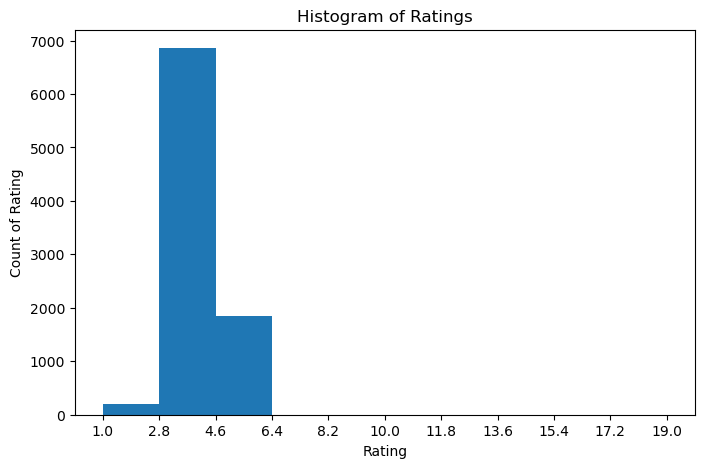

In [10]:
# Creat a histogram to check skweness of data
# Replace null values by its mean if data is not skewed
# Replace null values by its median if data is skewed

count, bin_edges = np.histogram(df_apps['Rating'].dropna())

df_apps['Rating'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Ratings') # title
plt.ylabel('Count of Rating') # y-label
plt.xlabel('Rating') # x-label

plt.show()

In [11]:
# Calculating the mean of ratings to add it to empty cells of column ratings
avg_rating=df_apps['Rating'].astype('float').mean(axis=0)
print("Average of rating:", avg_rating)

Average of rating: 4.189542336669298


In [12]:
# Cleaning Dataset
# Replacing the empty rating cells with average rating
df_apps['Rating'].replace(np.nan, avg_rating, inplace=True)

In [13]:
# Cleaning Dataset
# Inspecting the remaining null values
df_apps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [14]:
# Cleaning Dataset
# dropping the remaining null values
df_apps.dropna(inplace=True)

In [15]:
# Confirming nulls were removed
df_apps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [16]:
# Printing the unique categories of the apps
df_apps['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [17]:
# Creating a subset of unique categories and its mean rating 
# Here we can identify what apps categories has the highest mean rating
df_cat = df_apps.groupby('Category').mean().sort_values(by='Rating').tail(10)

In [18]:
df_cat.head()

,Rating
Category,
SOCIAL,4.246513
HEALTH_AND_FITNESS,4.251111
BEAUTY,4.260094
GAME,4.277438
PARENTING,4.281590


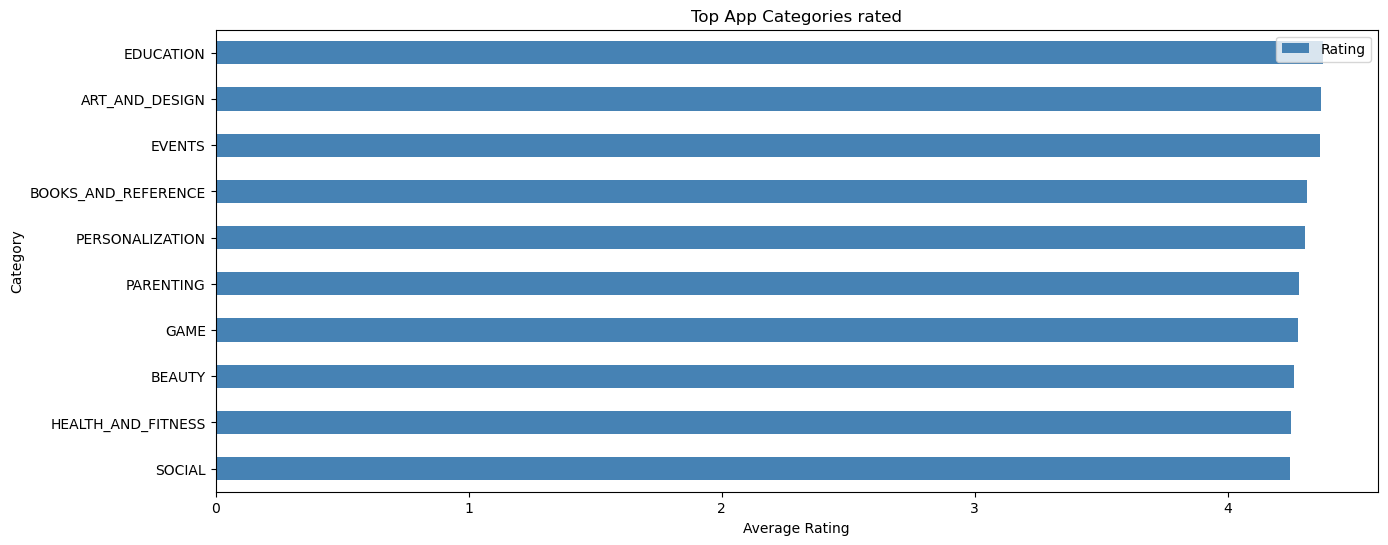

In [19]:
# Plotting the top Apps Categories rated
df_cat.plot(kind='barh', figsize=(15, 6), color='steelblue')
plt.title('Top App Categories rated')
plt.xlabel('Average Rating')
plt.show()

In [20]:
# Cleaning Dataset
# Cleaning installs column for usage
df_apps['Installs'] = df_apps.Installs.apply(lambda x: x.strip('+'))
df_apps['Installs'] = df_apps.Installs.apply(lambda x: x.replace(',', ''))

In [21]:
# Coverting the type of installs column to int
df_apps['Installs'] =pd.to_numeric(df_apps['Installs'], errors='coerce')

In [22]:
df_apps['Installs'].dtypes

dtype('int64')

In [23]:
# Creating a subset of unique categories and the sum of each category installs
# Here we can identify what apps categories has the highest download count
df_ins = df_apps.groupby('Category').sum().sort_values(by='Installs').tail(15)

In [24]:
df_ins.drop('Rating', inplace=True, axis=1)

In [25]:
df_ins

,Installs
Category,
SPORTS,1528574498
BOOKS_AND_REFERENCE,1916468576
PERSONALIZATION,2074483782
ENTERTAINMENT,2455660000
SHOPPING,2573348785
NEWS_AND_MAGAZINES,5393217760
VIDEO_PLAYERS,6222002720
TRAVEL_AND_LOCAL,6361887146
PHOTOGRAPHY,9721247655


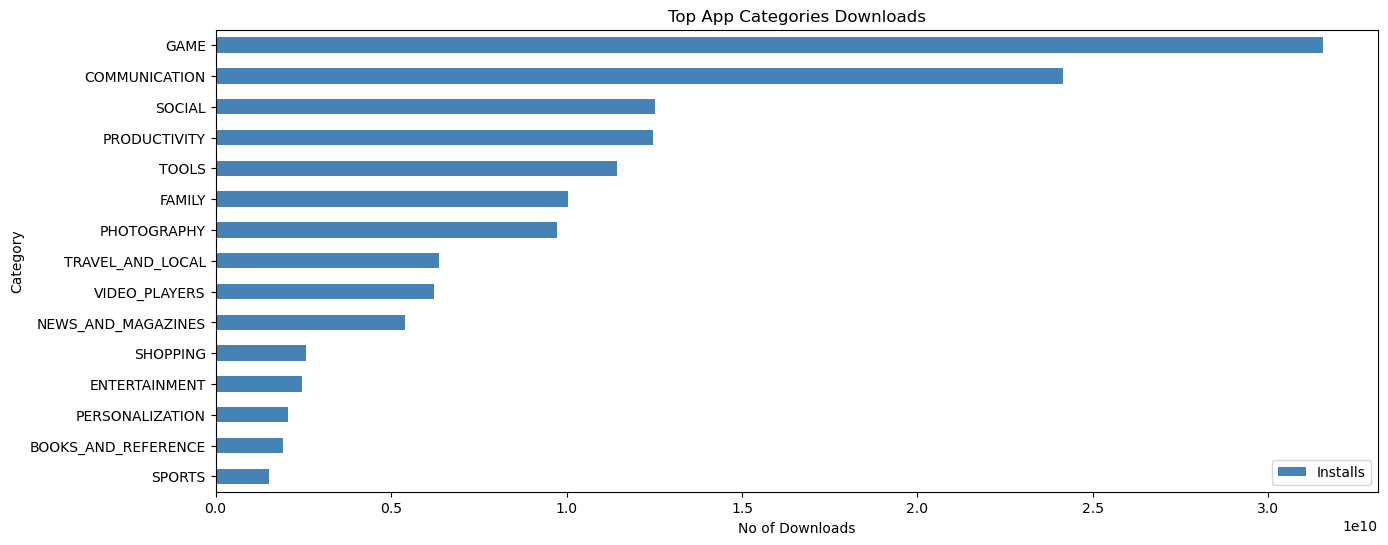

In [26]:
# Plotting the top Apps Categories downloaded
df_ins.plot(kind='barh', figsize=(15, 6), color='steelblue')
plt.title('Top App Categories Downloads')
plt.xlabel('No of Downloads')
plt.show()

In [27]:
# Cleaning Dataset
# Cleaning price column for usage
df_apps['Price'] = df_apps.Price.apply(lambda x: x.replace('$', ''))
df_apps.Price = pd.to_numeric(df_apps.Price)

In [28]:
# Creating a subset of unique categories and the mean price of each category
# Here we can identify what apps categories has the highest price mean
df_prc = df_apps.groupby('Category').mean().sort_values(by='Price').tail(10)

In [29]:
del df_prc['Installs']

In [30]:
del df_prc['Rating']

In [31]:
df_prc

,Price
Category,
PERSONALIZATION,0.388549
WEATHER,0.395366
BUSINESS,0.410515
BOOKS_AND_REFERENCE,0.523013
PRODUCTIVITY,0.616536
FAMILY,1.247978
EVENTS,1.718594
MEDICAL,2.501691
LIFESTYLE,6.329410


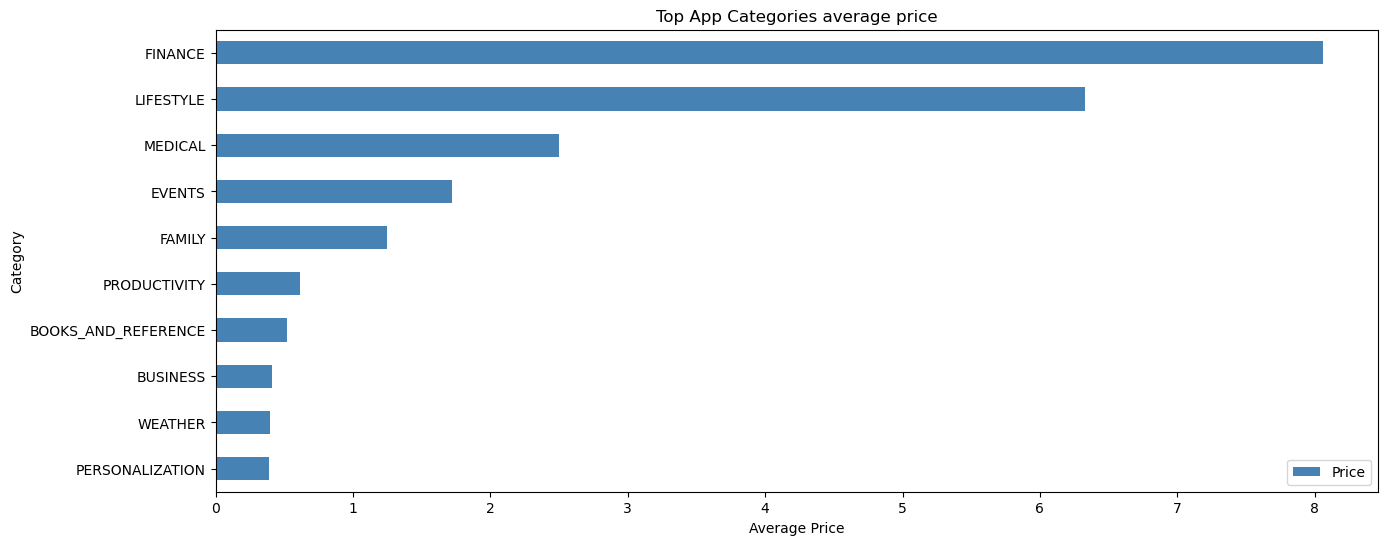

In [32]:
# Plotting the top Apps Categories average price
df_prc.plot(kind='barh', figsize=(15, 6), color='steelblue')
plt.title('Top App Categories average price')
plt.xlabel('Average Price')
plt.show()

In [33]:
# Creating a subset of applications names, rating, installs and price
# Here we can identify top 10 applications rated, installed and priced
top10=df_apps[['App', 'Rating', 'Installs', 'Price']]
top10.set_index('App', inplace=True)
top10.head(10)

,Rating,Installs,Price
App,,,
Photo Editor & Candy Camera & Grid & ScrapBook,4.1,10000,0.0
Coloring book moana,3.9,500000,0.0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",4.7,5000000,0.0
Sketch - Draw & Paint,4.5,50000000,0.0
Pixel Draw - Number Art Coloring Book,4.3,100000,0.0
Paper flowers instructions,4.4,50000,0.0
Smoke Effect Photo Maker - Smoke Editor,3.8,50000,0.0
Infinite Painter,4.1,1000000,0.0
Garden Coloring Book,4.4,1000000,0.0


In [34]:
# Top 10 apps installed
top10.nlargest(10, 'Installs')

,Rating,Installs,Price
App,,,
Google Play Books,3.9,1000000000,0.0
Messenger – Text and Video Chat for Free,4.0,1000000000,0.0
WhatsApp Messenger,4.4,1000000000,0.0
Google Chrome: Fast & Secure,4.3,1000000000,0.0
Gmail,4.3,1000000000,0.0
Hangouts,4.0,1000000000,0.0
Messenger – Text and Video Chat for Free,4.0,1000000000,0.0
Hangouts,4.0,1000000000,0.0
Skype - free IM & video calls,4.1,1000000000,0.0


In [35]:
# Top 10 apps priced
top10.nlargest(10, 'Price')

,Rating,Installs,Price
App,,,
I'm Rich - Trump Edition,3.6,10000,400.00
most expensive app (H),4.3,100,399.99
💎 I'm rich,3.8,10000,399.99
I am rich,3.8,100000,399.99
I am Rich Plus,4.0,10000,399.99
I Am Rich Premium,4.1,50000,399.99
I am Rich!,3.8,1000,399.99
I am rich(premium),3.5,5000,399.99
I Am Rich Pro,4.4,5000,399.99


In [36]:
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [37]:
df_apps.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [38]:
# Saving the cleaned dataset to a new csv file
df_apps.to_csv('GooglePlayAppsCleaned.csv')